# <center>Capstone project by TAOUDI Abderrahim</center>

# Predict books overall rating and number of raters using Goodreads books dataset

## 1) The problem

The main objective of our project is to try to predict overall rating of books, and number of raters using their properties (title, authors, genre, description, cover image, ...).<br>
Number of raters gives an idea on book popularity.<br>
Average rating gives an idea on quality of the book.<br>

Our project is composed of a classification (avg rating) and a regression (number of raters) problems.

We want also to understand and explain books rating and reading by trying to answer these questions :
- What are the books properties that most influence the target value?
- Does the description of the book affect the  target value?
- Does the cover image of the book affect the  target value?

In order to meet these objectives, we will use the GoodReads website which is one of the largest sites for readers and book recommendations. The list of books we will use is https://www.goodreads.com/list/show/1.Best_Books_Ever. It contains more than 50 000 books description and ratings.

## 2) The data

The source of our data is the following site : https://www.goodreads.com/list/show/1.Best_Books_Ever. We will use web scraping to build our dataset. 
The content of robots.txt allows us to do web scraping on this page :

In [1]:
import requests
print(requests.get("https://www.goodreads.com/robots.txt").text)

# See http://www.robotstxt.org/robotstxt.html for documentation on how to use the robots.txt file
User-agent: *
Disallow: /about/team_member/
Disallow: /admin
Disallow: /api
Disallow: /blog/list_rss
Disallow: /book/reviews/
Disallow: /book_link/follow/
Disallow: /buy_buttons/
Disallow: /ebooks
Disallow: /event/show/
Disallow: /home/index_rss
Disallow: /oggiPlayerLoader.htm
Disallow: /photo/group/
Disallow: /quotes/list_rss
Disallow: /reader
Disallow: /review/list_rss
Disallow: /review/rate
Disallow: /shelf/user_shelves
Disallow: /story
Disallow: /tooltips
Disallow: /track
Disallow: /trivia/answer
Disallow: /user/updates_rss

Sitemap: https://www.goodreads.com/siteindex.author.xml
Sitemap: https://www.goodreads.com/siteindex.author_community_question.xml
Sitemap: https://www.goodreads.com/siteindex.award.xml
Sitemap: https://www.goodreads.com/siteindex.blog.xml
Sitemap: https://www.goodreads.com/siteindex.book_community_question.xml
Sitemap: https://www.goodreads.com/siteindex.genre.xml

#### - A small sample of the entries, features, values

This is a sample of our dataset :

In [2]:
import pandas as pd
import numpy as np
books = pd.read_csv('data/books.csv')
books.head()

,book_title,book_lang,book_authors,book_rating,book_rating_count,book_review_count,book_desc,book_format,book_edition,book_pages,book_isbn,book_genres,book_image_file
0,The Hunger Games,English,Suzanne Collins,4.33,5973667,165208,"Could you survive on your own, in the wild, wi...",Hardcover,First Edition,374.0,9780439023481,Young Adult|Fiction|Science Fiction|Dystopia|F...,images/1/1_0.jpg
1,Harry Potter and the Order of the Phoenix,English,J.K. Rowling|Mary GrandPré,4.49,2289566,37770,There is a door at the end of a silent corrido...,Paperback,US Edition,870.0,9780439358071,Fantasy|Young Adult|Fiction,images/1/1_1.jpg
2,To Kill a Mockingbird,English,Harper Lee,4.27,4168178,85582,The unforgettable novel of a childhood in a sl...,Paperback,NaN,324.0,NaN,Classics|Fiction|Historical|Historical Fiction...,images/1/1_2.jpg
3,Pride and Prejudice,English,Jane Austen|Anna Quindlen,4.26,2737374,59898,Alternate cover edition of ISBN 9780679783268S...,Paperback,"Modern Library Classics, USA / CAN",279.0,NaN,Classics|Fiction|Romance|Historical|Historical...,images/1/1_3.jpg
4,Twilight,English,Stephenie Meyer,3.59,4627063,99664,About three things I was absolutely positive.F...,Paperback,NaN,501.0,9780316015844,Young Adult|Fantasy|Romance|Paranormal|Vampire...,images/1/1_4.jpg


Here are some cover pages :

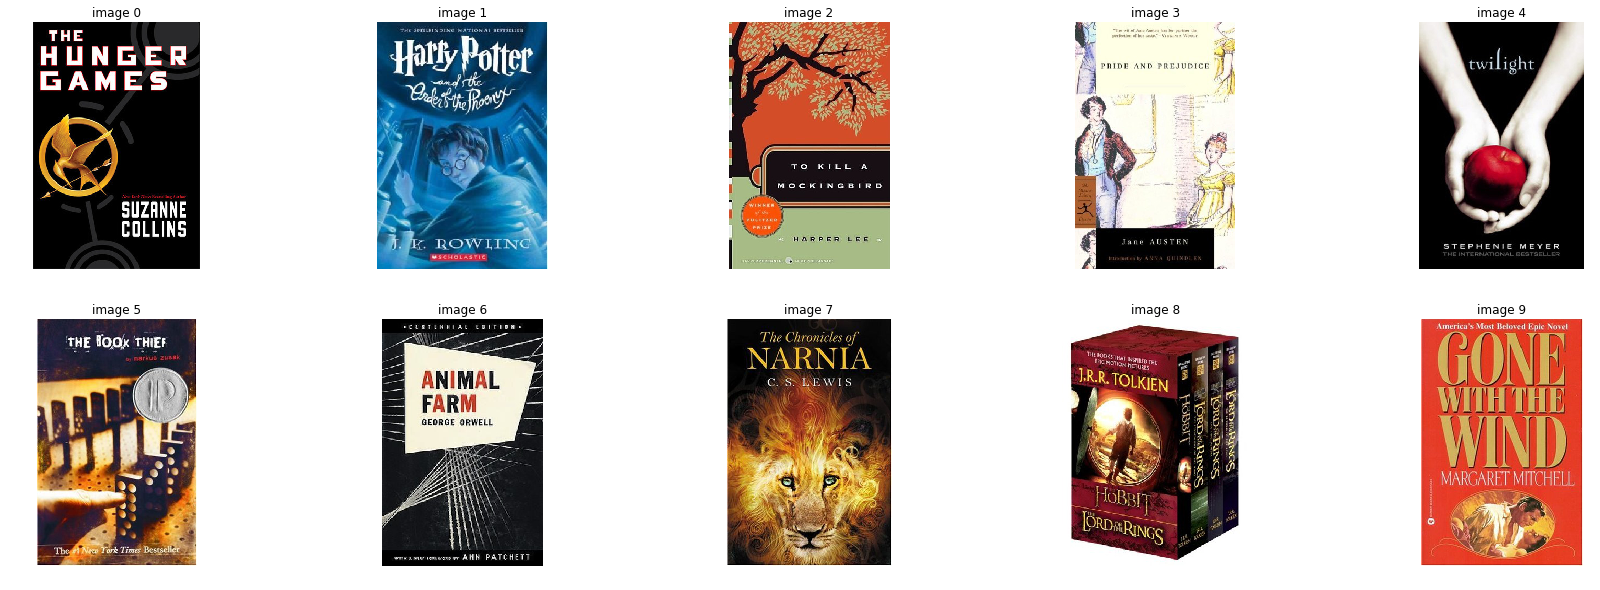

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
fig=plt.figure(figsize=(30,10))
for i in range(10):
    fig.add_subplot(2,5,1+i)
    plt.axis('off')
    plt.title(f'image {i}')
    plt.imshow(Image.open('data/'+books['book_image_file'][i]))

In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58111 entries, 0 to 58110
Data columns (total 13 columns):
book_title           58111 non-null object
book_lang            54448 non-null object
book_authors         58111 non-null object
book_rating          58111 non-null float64
book_rating_count    58111 non-null int64
book_review_count    58111 non-null int64
book_desc            56958 non-null object
book_format          56665 non-null object
book_edition         6157 non-null object
book_pages           55802 non-null float64
book_isbn            43572 non-null object
book_genres          54465 non-null object
book_image_file      58111 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 5.8+ MB


There is more than 58 000 books, including more than 46 000 english books.

We will keep only english books. One of the reasons is that our project will contains text analysis. Most of text libraries does not support non english languages very well.

In [5]:
data = books[books.book_lang=='English'].copy().reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46023 entries, 0 to 46022
Data columns (total 13 columns):
book_title           46023 non-null object
book_lang            46023 non-null object
book_authors         46023 non-null object
book_rating          46023 non-null float64
book_rating_count    46023 non-null int64
book_review_count    46023 non-null int64
book_desc            45575 non-null object
book_format          45564 non-null object
book_edition         4573 non-null object
book_pages           44664 non-null float64
book_isbn            36984 non-null object
book_genres          43775 non-null object
book_image_file      46023 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 4.6+ MB


#### - Number of features and samples

There is more than 46 000 english books in the dataset.<br>
We have 10 features and two target variables (book_rating and book_rating_count).

#### - Information captured by the (groups of) features
All of features are self explanatory :<br>
book_title           : The title of the book.<br>
book_lang            : The language of the book.<br>
book_authors         : List of book authors.<br>
book_desc            : The description of the book.<br>
book_format          : The format of the book (Hardcover, ...).<br>
book_edition         : The edition of the book.<br>
book_pages           : The book number of pages.<br>
book_isbn            : Book isbn number.<br>
book_genres          : Genres of the book choson by books readers and raters.<br>
book_image_file      : Link to image file stored on local disk.<br>
### Data cleaning and manipulating
Dataset contains, for some features,  missing values and probably incorrect data.<br>
book_title           : Text<br>
book_lang            : Categorical<br>
book_authors         : Categorical(List) : Must be controlled, cleaned.<br>
book_desc            : Text<br>
book_format          : Catogorical<br>
book_edition         : Must be controlled, cleaned.<br>
book_pages           : Numeric<br>
book_isbn            : Must be controlled, cleaned. We will check if there is duplicates using title, format and isbn.<br>
book_genres          : Categorical(List)<br>
book_image_file      : Link to image file stored on local disk.<br>
#### - Quality of the data: missing, incorrrect values, data completeness

#### missiong values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46023 entries, 0 to 46022
Data columns (total 13 columns):
book_title           46023 non-null object
book_lang            46023 non-null object
book_authors         46023 non-null object
book_rating          46023 non-null float64
book_rating_count    46023 non-null int64
book_review_count    46023 non-null int64
book_desc            45575 non-null object
book_format          45564 non-null object
book_edition         4573 non-null object
book_pages           44664 non-null float64
book_isbn            36984 non-null object
book_genres          43775 non-null object
book_image_file      46023 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 4.6+ MB


Most of features have no (or very little) missing values.

The following columns have some missing values :<br>
**book_lang :** this feature contains only one value : "English", so we can drop it.<br>
**book_desc :**  This feature has few missing values. We will drop them because :<br>
- Book description is important for our analysis
- It's not unseful to replace it with a default value (like unknow for example)
- There is very few missing values.

**book_format :** This feature has also few missing values, so we can drop them.

**book_pages :** This feature has also few missing values, so we can drop them.

**book_edition :** most of data is missing. We will drop this feature.

**book_isbn :** this information is just a serial number and has no meaning. We will use it only to check for duplicate rows and we will drop it at the end.

**book_genres :** This feature has also few missing values, but we can replace missing values with a defaut value  "unknown".

In [7]:
data['book_genres'].fillna('unknown', inplace=True)
data.dropna(subset=['book_desc','book_format','book_pages'], inplace=True)
data.drop('book_edition', 1, inplace=True)
data.drop('book_lang', 1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44025 entries, 0 to 46022
Data columns (total 11 columns):
book_title           44025 non-null object
book_authors         44025 non-null object
book_rating          44025 non-null float64
book_rating_count    44025 non-null int64
book_review_count    44025 non-null int64
book_desc            44025 non-null object
book_format          44025 non-null object
book_pages           44025 non-null float64
book_isbn            36076 non-null object
book_genres          44025 non-null object
book_image_file      44025 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 4.0+ MB


#### Check for duplicate data

We will check if there is duplicates using title, format and isbn.

In [8]:
cols = ['book_title','book_format','book_isbn']
tmp = data[cols].copy()
for col in cols:
    tmp[col] = tmp[col].str.lower().str.strip().fillna('unknown')
tmp.duplicated(keep=('first')).sum()

765

There is 765 duplicate values.

Here is some examples:

In [9]:
data[tmp.duplicated(keep=('first'))==True].head(2)

,book_title,book_authors,book_rating,book_rating_count,book_review_count,book_desc,book_format,book_pages,book_isbn,book_genres,book_image_file
261,Island of the Blue Dolphins,Scott O'Dell,3.83,274338,7894,An alternate cover edition can be found hereIn...,Paperback,184.0,9780440439882,Young Adult|Fiction|Historical|Historical Fict...,images/3/3_63.jpg
1559,Beyond the Shadows,Brent Weeks,4.28,82760,2098,A new queen has usurped the throne and is lead...,Mass Market Paperback,689.0,9780316033664,Fantasy|Fiction|Fantasy|Epic Fantasy|Fantasy|M...,images/17/17_0.jpg


In [10]:
data[tmp.book_isbn=='9780440439882']

,book_title,book_authors,book_rating,book_rating_count,book_review_count,book_desc,book_format,book_pages,book_isbn,book_genres,book_image_file
259,Island of the Blue Dolphins,Scott O'Dell,3.83,274536,7899,An alternate cover edition can be found hereIn...,Paperback,184.0,9780440439882,Young Adult|Fiction|Historical|Historical Fict...,images/3/3_61.jpg
261,Island of the Blue Dolphins,Scott O'Dell,3.83,274338,7894,An alternate cover edition can be found hereIn...,Paperback,184.0,9780440439882,Young Adult|Fiction|Historical|Historical Fict...,images/3/3_63.jpg


We will drop them

In [11]:
data.drop(tmp[tmp.duplicated(keep=('first'))==True].index, axis=0, inplace=True)
data.drop('book_isbn', 1, inplace=True)
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43260 entries, 0 to 43259
Data columns (total 10 columns):
book_title           43260 non-null object
book_authors         43260 non-null object
book_rating          43260 non-null float64
book_rating_count    43260 non-null int64
book_review_count    43260 non-null int64
book_desc            43260 non-null object
book_format          43260 non-null object
book_pages           43260 non-null float64
book_genres          43260 non-null object
book_image_file      43260 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 3.3+ MB


#### - Outliers

We will check numeric features for outliers. Categorical features were already analyzed.


In [12]:
data.describe()

,book_rating,book_rating_count,book_review_count,book_pages
count,43260.000000,4.326000e+04,43260.000000,43260.000000
mean,4.018155,4.680352e+04,2219.895724,340.044313
std,0.319100,2.212862e+05,7734.110544,258.594893
min,0.000000,0.000000e+00,0.000000,0.000000
25%,3.830000,7.980000e+02,63.000000,224.000000
50%,4.030000,4.201500e+03,278.000000,316.000000
75%,4.210000,1.693325e+04,1090.000000,400.000000
max,5.000000,6.380079e+06,165268.000000,14777.000000


As we can see, book_rating are between 0 and 5, which is OK.

for book_rating_count and book_review_count, there is some books with 0 ratings!<br>
we have to drop books with less than 10 ratings.
book_review_count is not important for us so we can drop it.

In [13]:
data.drop(data[(data.book_rating_count<10)].index, axis=0, inplace=True)
data.drop(['book_review_count'], 1, inplace=True)
data.describe()

,book_rating,book_rating_count,book_pages
count,42110.000000,4.211000e+04,42110.00000
mean,4.009733,4.808158e+04,343.64550
std,0.284808,2.241505e+05,258.41065
min,1.680000,1.000000e+01,0.00000
25%,3.830000,9.590000e+02,228.00000
50%,4.020000,4.532500e+03,320.00000
75%,4.200000,1.763075e+04,401.00000
max,5.000000,6.380079e+06,14777.00000


For book_pages, let's plot a boxplot

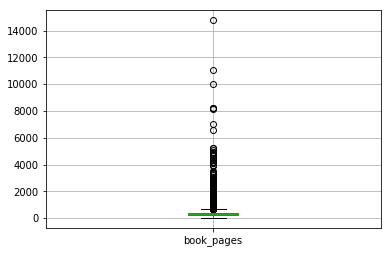

In [14]:
data.boxplot(column=['book_pages']);

Data distribution is not clear in this boxplot. We will replot it after applying log transformation.

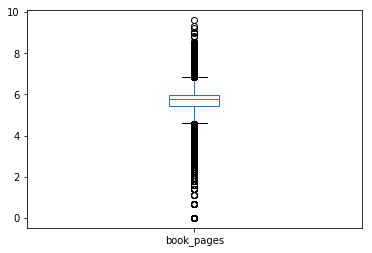

In [15]:
data['book_pages'].apply(np.log1p).plot.box();

A 2.5 interquatile range is the following

In [16]:
Q1 = data['book_pages'].apply(np.log1p).quantile(0.25)
Q3 = data['book_pages'].apply(np.log1p).quantile(0.75)
IQR = Q3 - Q1
rg=2.5
print ('Lower limit :', np.exp((Q1 - rg * IQR)), 'Upper limit:' ,np.exp((Q1 + rg * IQR)))

Lower limit : 56.08659248860651 Upper limit: 935.0006422774381


It's very unlikely to have books with more than 1000 pages or less than 50. This data is very probably outliers.

We will remove these books.

In [17]:
data.drop(data[(data.book_pages>1000) | (data.book_pages<50)].index, axis=0, inplace=True)

#### - Controling data

- **book_title**

We will chech books with one or two characters.

In [18]:
data[data.book_title.str.len() <= 1]

,book_title,book_authors,book_rating,book_rating_count,book_desc,book_format,book_pages,book_genres,book_image_file
4581,Q,Luther Blissett|Shaun Whiteside|Wu Ming,4.17,6125,"In 1517, Martin Luther nails his ninety-five t...",Paperback,768.0,Historical|Historical Fiction|Fiction|Historic...,images/49/49_99.jpg
24731,Z,Michael Thomas Ford,3.63,691,The First Rule of Torching: Cleanse with fire....,Hardcover,276.0,Horror|Zombies|Horror|Young Adult|Science Fict...,images/321/321_0.jpg
40093,V,A.C. Crispin,3.88,1276,TRY TO RESISTThey arrived—tens of thousands of...,Mass Market Paperback,402.0,Science Fiction|Fiction|Horror,images/540/540_94.jpg


Using a google search, these books exists.

In [19]:
data[data.book_title.str.len() == 2]

,book_title,book_authors,book_rating,book_rating_count,book_desc,book_format,book_pages,book_genres,book_image_file
856,We,Yevgeny Zamyatin|Clarence Brown,3.94,61828,The exhilarating dystopian novel that inspired...,Paperback,255.0,Fiction|Science Fiction|Science Fiction|Dystop...,images/9/9_77.jpg
3672,JR,William Gaddis|Frederick R. Karl,4.29,2584,J R is the long-awaited novel from William Gad...,Paperback,752.0,Fiction|Classics|Literature|Novels|Literature|...,images/40/40_1.jpg
6528,S.,J.J. Abrams|Doug Dorst,3.84,17266,"One book. Two readers. A world of mystery, men...",Hardcover,456.0,Fiction|Mystery|Fantasy|Writing|Books About Books,images/71/71_69.jpg
11775,Rx,Tracy Lynn,3.54,2357,Thyme Gilchrest is an honors student.Thyme Gil...,Paperback,272.0,Young Adult|Fiction|Contemporary,images/134/134_26.jpg
12627,Us,Sarina Bowen|Elle Kennedy,4.36,13662,Can your favorite hockey players finish their ...,Paperback,322.0,Romance|M M Romance|Romance|Sports|Sports|New ...,images/144/144_46.jpg
13286,UR,Stephen King,3.69,16717,"Reeling from a painful break-up, English instr...",Kindle Edition,61.0,Horror|Fiction|Short Stories|Fantasy|Science F...,images/152/152_23.jpg
16214,R³,Jorge Enrique Ponce,3.69,13,"Dry and wicked, R³ takes us on a gripping meta...",Kindle Edition,172.0,unknown,images/187/187_38.jpg
20730,V.,Thomas Pynchon,3.96,18249,"The wild, macabre tale of the twentieth centur...",Paperback,547.0,Fiction|Literature|Classics|Novels|Literature|...,images/258/258_10.jpg
21291,47,Walter Mosley,3.71,1646,Mosley deftly weaves historical and speculativ...,Paperback,272.0,Historical|Historical Fiction|Young Adult|Fant...,images/267/267_49.jpg
23691,It,Alexa Chung,3.43,7500,"In It, her first book, the global fashion-tren...",Hardcover,192.0,Nonfiction|Couture|Fashion|Biography,images/305/305_21.jpg


We have checked some of them, and they exists.

Book titles seems to be correct.

- **book_authors :**


In [20]:
data[data.book_authors.str.len() <= 3]

,book_title,book_authors,book_rating,book_rating_count,book_desc,book_format,book_pages,book_genres,book_image_file
1461,The True Confessions of Charlotte Doyle,Avi,3.83,76138,An ocean voyage of unimaginable consequences.....,Mass Market Paperback,278.0,Historical|Historical Fiction|Young Adult|Fict...,images/16/16_10.jpg
10899,The Cross of Lead,Avi,3.61,22016,"""Asta's Son"" is all he's ever been called. The...",Hardcover,262.0,Historical|Historical Fiction|Young Adult|Fict...,images/123/123_31.jpg
12538,Vice: New and Selected Poems,Ai,4.12,468,Collected here are poems from Ai's previous fi...,Paperback,272.0,Poetry|Academic|Read For School|Womens|Literar...,images/143/143_30.jpg
27631,JLS: Just Between Us: Our Private Diary,JLS,4.26,88,"With a triple platinum no. 1 album, two no. 1 ...",Hardcover,288.0,Nonfiction|Biography|Autobiography|Biography|M...,images/365/365_36.jpg
29163,Tantra,Adi,3.49,393,"Anu is a leather wearing, no-nonsense professi...",Paperback,344.0,Paranormal|Vampires|Fantasy|Fantasy|Urban Fant...,images/388/388_4.jpg
29445,Bright Shadow,Avi,3.46,658,Five wishes can save a suffering kingdom--but ...,Hardcover,167.0,Fantasy|Childrens|Young Adult|Fiction|Fantasy|...,images/392/392_70.jpg
33451,Something Upstairs,Avi,3.83,2430,The mystery deepens The room was shabby and di...,Paperback,128.0,Mystery|Historical|Historical Fiction|Fiction|...,images/450/450_14.jpg
36966,Second Nature,Jae,4.18,1183,Lesbian Fiction: Shape-Shifter Romance. Noveli...,Paperback,606.0,Fantasy|GLBT|Lesbian|LGBT|Romance|Fantasy|Para...,images/499/499_8.jpg
37181,Conflict of Interest,Jae,4.18,1510,Workaholic Detective Aiden Carlisle isn't look...,Kindle Edition,562.0,GLBT|Lesbian|Romance|LGBT|Mystery|Crime|Romanc...,images/501/501_92.jpg
38597,Poppy,Avi,3.96,7831,At the very edge of Dimwood Forest stood an ol...,Unknown Binding,163.0,Fantasy|Childrens|Fiction|Animals,images/520/520_89.jpg


These authors exists also.

Book authors seems to be correct.

Now, let's see how much book written by each author.


In [21]:
data.book_authors = data.book_authors.str.lower().str.strip().str.split('|')
list_authors = pd.Series([author for authors in data.book_authors for author in authors]).value_counts()
list_authors

stephen king                   145
terry pratchett                104
neil gaiman                    103
nora roberts                   100
james patterson                 91
agatha christie                 89
cassandra clare                 80
rick riordan                    70
meg cabot                       66
j.k. rowling                    62
erin hunter                     62
francine pascal                 61
jane austen                     59
dean koontz                     59
mercedes lackey                 57
sherrilyn kenyon                57
carolyn keene                   57
karen kingsbury                 53
george r.r. martin              52
alex archer                     52
j.d. robb                       51
j.r.r. tolkien                  51
orson scott card                50
charles dickens                 49
sarah j. maas                   49
c.s. lewis                      49
l.j. smith                      48
darussalam                      48
bella forrest       

In [22]:
list_authors.index.nunique()

23029

There is about 23 000 authors in the dataset. Most of them have only one book.

We will keep authors with more than 10 books, and replace other authors with "other".

In [23]:
list_authors[list_authors>=10].index.nunique()

836

In [24]:
authors_to_keep=list_authors[list_authors>=10].index.values
authors_to_keep[:10]

array(['stephen king', 'terry pratchett', 'neil gaiman', 'nora roberts',
       'james patterson', 'agatha christie', 'cassandra clare',
       'rick riordan', 'meg cabot', 'j.k. rowling'], dtype=object)

In [25]:
def replace_authors(list):
    res = []
    [res.append(x) for x in list if x in authors_to_keep and x not in res]
    if (len(res) == 0):
        res.append('other')
    return res
data.book_authors = data.book_authors.apply(replace_authors)

In [26]:
data.book_authors[:10]

0                 [suzanne collins]
1     [j.k. rowling, mary grandpré]
2                      [harper lee]
3      [jane austen, anna quindlen]
4                 [stephenie meyer]
5                    [markus zusak]
6                   [george orwell]
7                      [c.s. lewis]
10                     [john green]
11                          [other]
Name: book_authors, dtype: object

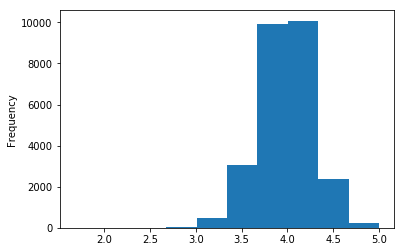

In [27]:
data[data.book_authors.apply(",".join) == 'other' ].book_rating.plot.hist();

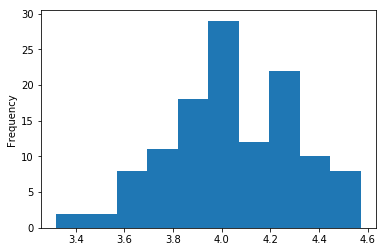

In [28]:
data[data.book_authors.apply(",".join) == 'stephen king' ].book_rating.plot.hist();

- **book_desc :**

In [29]:
data[data.book_desc.str.len() <= 20]

,book_title,book_authors,book_rating,book_rating_count,book_desc,book_format,book_pages,book_genres,book_image_file
10914,I Am Ozzy,[other],4.07,20761,I Am Ozzy,Hardcover,391.0,Music|Biography|Nonfiction|Biography|Autobiogr...,images/123/123_49.jpg
12634,Foundation,[isaac asimov],4.16,377048,Foundation,Paperback,234.0,Science Fiction|Fiction|Classics,images/144/144_54.jpg
14115,The Gypsy Morph,[terry brooks],4.15,12286,The Gypsy Morph,Hardcover,402.0,Fantasy|Fiction|Science Fiction Fantasy,images/161/161_55.jpg
14605,Big Bad Love,[other],4.12,1982,"Book by Brown, Larry",Paperback,228.0,Short Stories|Fiction|American|Southern|Gothic...,images/166/166_96.jpg
15901,Sun Stand Still: What Happens When You Dare to...,[other],4.19,3731,Rare book,Paperback,240.0,Christian|Nonfiction|Religion|Faith|Christian|...,images/183/183_4.jpg
16773,The Rift War,[other],3.57,30,Discontinued,Paperback,562.0,Science Fiction|Fantasy,images/195/195_63.jpg
17292,The Shard of Fire,[other],2.77,13,Out of print.,Kindle Edition,230.0,Fantasy,images/203/203_82.jpg
19487,The Bean Trees: Animal Dreams ; Pigs In Heaven,[barbara kingsolver],4.22,3333,3 novels in 1 book,Paperback,343.0,Fiction|Novels|Realistic Fiction|Academic|Read...,images/239/239_23.jpg
19996,The Mustard Seed: The Gnostic Teachings of Jes...,[osho],4.45,412,update,Paperback,512.0,Spirituality|Philosophy|Nonfiction|Religion|Oc...,images/246/246_46.jpg
20690,Brimstone,[robert b. parker],4.00,3756,Brimstone,Hardcover,293.0,Westerns|Fiction|Historical|Historical Fiction...,images/257/257_44.jpg


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40331 entries, 0 to 43259
Data columns (total 9 columns):
book_title           40331 non-null object
book_authors         40331 non-null object
book_rating          40331 non-null float64
book_rating_count    40331 non-null int64
book_desc            40331 non-null object
book_format          40331 non-null object
book_pages           40331 non-null float64
book_genres          40331 non-null object
book_image_file      40331 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 3.1+ MB


These book descriptions seems to be not complete. They contains sometimes title, sometimes genre. This is not enough. We will drop them.

In [31]:
data.drop(data[data.book_desc.str.len() <= 20].index, axis=0, inplace=True) 
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40293 entries, 0 to 40292
Data columns (total 9 columns):
book_title           40293 non-null object
book_authors         40293 non-null object
book_rating          40293 non-null float64
book_rating_count    40293 non-null int64
book_desc            40293 non-null object
book_format          40293 non-null object
book_pages           40293 non-null float64
book_genres          40293 non-null object
book_image_file      40293 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 2.8+ MB


- **book_format :**

In [32]:
data.book_format = data.book_format.str.lower().str.strip()
tmp = data.book_format.value_counts()
tmp[:30]

paperback                22001
hardcover                 9823
kindle edition            4225
mass market paperback     2357
ebook                     1526
nook                        80
trade paperback             53
unknown binding             38
library binding             24
audiobook                   18
comics                      16
audio cd                    15
leather bound               10
mass market                  7
capa comum                   7
capa dura                    6
cloth                        6
paper                        6
online                       6
slipcased hardcover          5
graphic novels               5
hardback                     4
audio cassette               4
audible audio                3
audio                        3
board book                   2
online fiction               2
spiral-bound                 2
podiobook                    2
web                          1
Name: book_format, dtype: int64

We will merge some categories : for example, audio (audio cd, audiobook, audible audio, ...),  kindle (kindle edition, kindle ...)

In [33]:
tmp[tmp.index.str.contains('audio')==True].index

Index(['audiobook', 'audio cd', 'audio cassette', 'audible audio', 'audio',
       'paperback, kindle, ebook, audio', 'audio book'],
      dtype='object')

In [34]:
tmp[tmp.index.str.contains('kindle')==True].index

Index(['kindle edition', 'paperback and kindle',
       'paperback, kindle, ebook, audio', 'ebook kindle',
       'paperback, kindle ebook', 'paperback/kindle', 'kindle'],
      dtype='object')

In [35]:
data.book_format = data.book_format.replace(['audio cd', 'audiobook', 'audible audio', 'audio cassette', 'audio book', 'mp3 cd','cd-rom'], ['audio']*7)
data.book_format = data.book_format.replace(['kindle edition', 'ebook kindle'], ['kindle']*2)
data.book_format = data.book_format.replace(['mass market paperback'], ['mass market'])
data.book_format = data.book_format.replace(['unknown binding', 'library binding'], ['binding']*2)
data.book_format = data.book_format.replace(['comics', 'comic'], ['comics']*2)
tmp = data.book_format.value_counts()
tmp[:50]

paperback                            22001
hardcover                             9823
kindle                                4227
mass market                           2364
ebook                                 1526
nook                                    80
binding                                 62
trade paperback                         53
audio                                   45
comics                                  17
leather bound                           10
capa comum                               7
paper                                    6
cloth                                    6
capa dura                                6
online                                   6
graphic novels                           5
slipcased hardcover                      5
hardback                                 4
podiobook                                2
online fiction                           2
board book                               2
spiral-bound                             2
paperback a

We will keep the book formats with more than 10 rows and replace other formats by "other"

In [36]:
formats_to_keep = tmp[tmp >= 10].index
data.loc[~data["book_format"].isin(formats_to_keep), "book_format"] = "other"
tmp = data.book_format.value_counts()
tmp[:50]

paperback          22001
hardcover           9823
kindle              4227
mass market         2364
ebook               1526
other                 85
nook                  80
binding               62
trade paperback       53
audio                 45
comics                17
leather bound         10
Name: book_format, dtype: int64

- **book_genres :**

This column contains a list of genres. We will count number of each genre in the data

In [37]:
data.book_genres = data.book_genres.str.lower().str.strip().str.split('|')
genres_list = pd.Series([genre for genres in data.book_genres for genre in genres]).value_counts()
genres_list.index.nunique()

867

There is 867 genres in the data. We will keep genres which reprents 99% of data, and replace other values by "Other"

In [38]:
tmp = genres_list.cumsum()/genres_list.sum()
np.argmax(tmp.values >= 0.99)

421

In [39]:
genres_to_keep = genres_list[:450].index.values
genres_to_keep[:10]

array(['fiction', 'fantasy', 'romance', 'young adult', 'historical',
       'mystery', 'paranormal', 'nonfiction', 'science fiction',
       'historical fiction'], dtype=object)

We will use this list to modify book_genres

In [40]:
def replace_genre(list):
    res = []
    [res.append(x) for x in list if x in genres_to_keep and x not in res]
    if (len(res) == 0):
        res.append('other')
    return res
data.book_genres = data.book_genres.apply(replace_genre)

In [41]:
data.book_genres[:10]

0    [young adult, fiction, science fiction, dystop...
1                      [fantasy, young adult, fiction]
2    [classics, fiction, historical, historical fic...
3    [classics, fiction, romance, historical, histo...
4    [young adult, fantasy, romance, paranormal, va...
5    [historical, historical fiction, fiction, youn...
6    [classics, fiction, science fiction, dystopia,...
7    [fantasy, classics, fiction, young adult, chil...
8    [young adult, fiction, romance, contemporary, ...
9        [childrens, picture books, classics, fiction]
Name: book_genres, dtype: object

In [42]:
data.reset_index(drop=True, inplace=True)

#### - Feature engineering

##### - Numeric features 

- **book_rating :**

We will plot the histogram of data

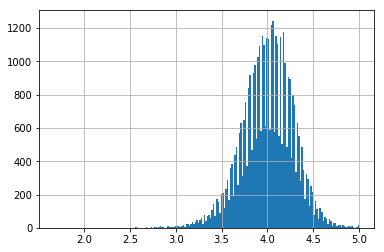

In [43]:
data.book_rating.hist(bins=200);

We can see that The distribution of data is quite normal.

In the other hand, Most of books have an average rating between 3.5 ans 4.5.

We will divide dataset into four balanced categories : Low, Medium, High and Very High :

In [44]:
pd.qcut(x= data.book_rating,q= [0, .25, .50, .75, 1.] , retbins=True)[1]

array([1.68, 3.83, 4.02, 4.19, 5.  ])

We will create four rating classes  : Low (less than 3.8), Medium(between 3.8 and 4), High ((between 4 and 4.2) and Very High (more than 4.2).

In [45]:
book_rating_class_names=['Low','Medium','High','Very High']
data['book_rating_class'] = pd.cut(x= data.book_rating, bins=[0,3.825,4.019,4.19,5],labels=[0,1,2,3])
data.book_rating_class.value_counts().sort_index()

0     9969
1    10135
2    10372
3     9817
Name: book_rating_class, dtype: int64

Now, our new classes are quite balanced.
- **book_rating_count :**

Lets plot the histogram of data :


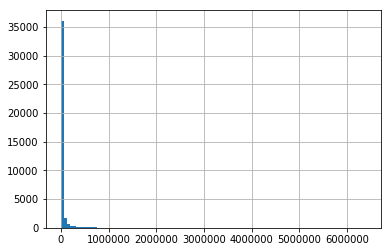

In [46]:
data.book_rating_count.hist(bins=100);

Data is highly skewed.

After applying applying log1p transformation, data distribution is now quite normal.

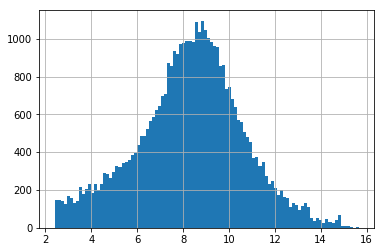

In [47]:
import numpy as np
data['book_rating_count_log'] = data.book_rating_count.apply(lambda x:np.log1p(x))
data.book_rating_count_log.hist(bins=100);

- **book_pages :**

The histogram of data is :

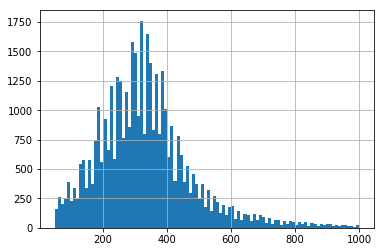

In [48]:
data.book_pages.hist(bins=100);

After applying log1p, The histogrman of data is :

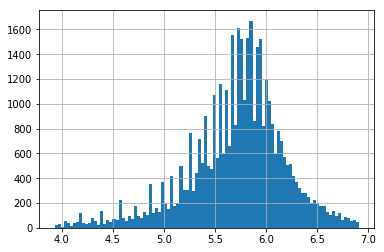

In [49]:
data.book_pages.apply(np.log1p).hist(bins=100);

Distribution of data after applying log1p looks more normal. Let's verify using qqplot

In [50]:
import matplotlib.pyplot as plt 
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
%matplotlib inline

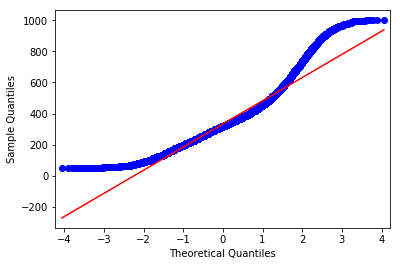

In [51]:
qqplot(data.book_pages.values, line='s');
plt.show()

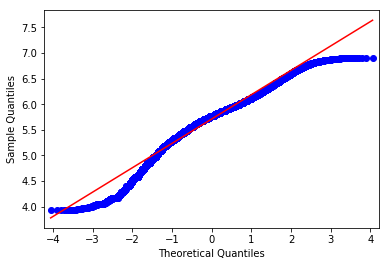

In [52]:
qqplot(data.book_pages.apply(np.log1p).values, line='s');
plt.show()

Applying log1p normalize data better.


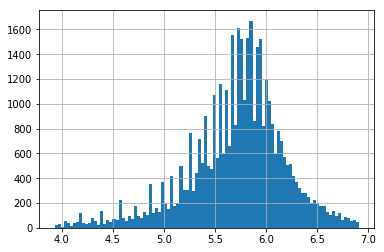

In [53]:
data['book_pages_log'] = data.book_pages.apply(np.log1p)
data.book_pages_log.hist(bins=100);

In [54]:
data.head()

,book_title,book_authors,book_rating,book_rating_count,book_desc,book_format,book_pages,book_genres,book_image_file,book_rating_class,book_rating_count_log,book_pages_log
0,The Hunger Games,[suzanne collins],4.33,5973667,"Could you survive on your own, in the wild, wi...",hardcover,374.0,"[young adult, fiction, science fiction, dystop...",images/1/1_0.jpg,3,15.602872,5.926926
1,Harry Potter and the Order of the Phoenix,"[j.k. rowling, mary grandpré]",4.49,2289566,There is a door at the end of a silent corrido...,paperback,870.0,"[fantasy, young adult, fiction]",images/1/1_1.jpg,3,14.643873,6.769642
2,To Kill a Mockingbird,[harper lee],4.27,4168178,The unforgettable novel of a childhood in a sl...,paperback,324.0,"[classics, fiction, historical, historical fic...",images/1/1_2.jpg,3,15.242990,5.783825
3,Pride and Prejudice,"[jane austen, anna quindlen]",4.26,2737374,Alternate cover edition of ISBN 9780679783268S...,paperback,279.0,"[classics, fiction, romance, historical, histo...",images/1/1_3.jpg,3,14.822510,5.634790
4,Twilight,[stephenie meyer],3.59,4627063,About three things I was absolutely positive.F...,paperback,501.0,"[young adult, fantasy, romance, paranormal, va...",images/1/1_4.jpg,0,15.347433,6.218600


We will aggregate all these transformations in one function : transform().

In [55]:
def replace_authors(list):
    res = []
    [res.append(x) for x in list if x in authors_to_keep and x not in res]
    if (len(res) == 0):
        res.append('other')
    return res
def replace_genre(list):
    res = []
    [res.append(x) for x in list if x in genres_to_keep and x not in res]
    if (len(res) == 0):
        res.append('other')
    return res
def transform(data):
    X = data.copy()
    X.book_authors = X.book_authors.fillna('anonymous').str.lower().str.strip().str.split('|').apply(replace_authors)
    X.book_format = X.book_format.str.lower().str.strip()
    X.book_format = X.book_format.replace(['audio cd', 'audiobook', 'audible audio', 'audio cassette', 'audio book', 'mp3 cd','cd-rom'], ['audio']*7)
    X.book_format = X.book_format.replace(['kindle edition', 'ebook kindle'], ['kindle']*2)
    X.book_format = X.book_format.replace(['mass market paperback'], ['mass market'])
    X.book_format = X.book_format.replace(['unknown binding', 'library binding'], ['binding']*2)
    X.book_format = X.book_format.replace(['comics', 'comic'], ['comics']*2)
    X.loc[~X["book_format"].isin(formats_to_keep), "book_format"] = "other"
    X.book_genres = X.book_genres.fillna('unknown').str.lower().str.strip().str.split('|').apply(replace_genre)
    X.drop(['book_lang','book_review_count','book_edition','book_isbn','book_image_file'],1,inplace=True)
    X['book_rating_class'] = pd.cut(x= X.book_rating, bins=[0,3.825,4.019,4.19,5],labels=[0, 1 , 2, 3])
    X['book_rating_count_log'] = X.book_rating_count.apply(lambda x:np.log1p(x))
    X['book_pages_log'] = X.book_pages.apply(np.log1p)
    X.reset_index(drop=True, inplace=True)
    return X

In [56]:
# transform(pd.read_csv('data/books.csv')).head()

##### - Categorical features 

- **book_authors, book_genres and book_format :**

We will use MultiLabelBinarizer to encode them.

In [57]:
from sklearn.preprocessing import MultiLabelBinarizer

In [58]:
authors_mb = MultiLabelBinarizer(classes=np.append(authors_to_keep,'other'))
authors_df = pd.DataFrame(authors_mb.fit_transform(data.book_authors),columns=authors_mb.classes_, index=data.index)

genres_mb = MultiLabelBinarizer(classes=np.append(genres_to_keep,'other'))
genres_df = pd.DataFrame(genres_mb.fit_transform(data.book_genres),columns=genres_mb.classes_, index=data.index)

format_mb = MultiLabelBinarizer(classes=np.append(formats_to_keep,'other'))
format_df = pd.DataFrame(format_mb.fit_transform(data.book_format.str.split('|')),columns=format_mb.classes_, index=data.index)

In [59]:
format_df.head()

,paperback,hardcover,kindle,mass market,ebook,nook,binding,trade paperback,audio,comics,leather bound,other
0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


##### - Text and image features 

- **book_title and book_desc :**

Our choice feature vectors for each text column. There is many options : tf-idf or pretrained sentence embeding models like Google Universal Sentence Encoder.<br>
Sentence embeding models are trained on huge volume of data, so, they are more powerful than simple algorithms like tf-idf.<br>

We will use Google Universal Sentence Encode.

- **book_image_file :**

We will use inception_v3 to create feature vector.

In [60]:
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image
from IPython.display import clear_output

In [61]:
module_text_url = "https://tfhub.dev/google/universal-sentence-encoder/2"
## create tensorflow graphs

text_graph = tf.Graph()
with text_graph.as_default():
    text_feature_extractor = hub.Module(module_text_url)
    input_texts = tf.placeholder(dtype=tf.string, shape=[None])
    text_features = text_feature_extractor(input_texts)
    init_text_op = tf.group([ tf.global_variables_initializer(), tf.tables_initializer() ])
    
module_img_url = "https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1"
module_img = hub.Module(module_img_url)
targetsize = hub.get_expected_image_size(module_img)

img_graph = tf.Graph()
with img_graph.as_default():
    img_feature_extractor = hub.Module(module_img_url)
    input_imgs = tf.placeholder(dtype=tf.float32, shape=[None, targetsize[0], targetsize[1], 3])
    img_features = img_feature_extractor(input_imgs)
    init_img_op = tf.group([ tf.global_variables_initializer(), tf.tables_initializer() ])
    
# for text
def get_features(X):
    tf.keras.backend.clear_session()
    with tf.Session(graph=text_graph) as sess:
        sess.run(init_text_op)
        features = sess.run(text_features, feed_dict={input_texts: X})
    return features
def get_batch_features(data,batch=3000):
    features=[]
    for X in  (data[pos:pos + batch] for pos in np.arange(0, len(data), batch)) :
        features.append(get_features(X))
    return np.concatenate(features)

# for images
def get_img_features(X):
    tf.keras.backend.clear_session()
    images = np.zeros([X.shape[0], targetsize[0], targetsize[1], 3])
    i = 0
    for _, img in X.items():
        # print (img)
        try:
            image = np.array(Image.open('data/'+img).convert('RGB').resize((targetsize[0], targetsize[1]), Image.ANTIALIAS)) / 255.0
            images[i, :, :, :] = image * 2.0 - 1.0
        except:
            pass
        i += +1
    with tf.Session(graph=img_graph) as sess:
        sess.run(init_img_op)
        features = sess.run(img_features, feed_dict={input_imgs: images})
    del images
    return features
def get_batch_img_features(data,batch=150):
    features=[]
    i=1
    nb=int(np.ceil(len(data)/batch))
    for X in  (data[pos:pos + batch] for pos in np.arange(0, len(data), batch)) :
        clear_output(wait=True)
        print(i,'/',nb)
        i += 1
        features.append(get_img_features(X))
    return np.concatenate(features)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


We will now update our transform() function to include all of our transformations

In [69]:
def load_data(data):
    X = data[data.book_lang=='English'].copy().reset_index(drop=True)
    # removing outliers and inconsistencies
    X['book_genres'].fillna('unknown', inplace=True)
    X.dropna(subset=['book_desc','book_format','book_pages'], inplace=True)
    cols = ['book_title','book_format','book_isbn']
    tmp = X[cols].copy()
    for col in cols:
        tmp[col] = tmp[col].str.lower().str.strip().fillna('unknown')
    X.drop(tmp[tmp.duplicated(keep=('first'))==True].index, axis=0, inplace=True)
    X.drop(X[(X.book_rating_count<10)].index, axis=0, inplace=True)
    X.drop(X[(X.book_pages>1000) | (X.book_pages<50)].index, axis=0, inplace=True)
    X.drop(X[X.book_desc.str.len() <= 20].index, axis=0, inplace=True) 
    return X
def clean_data(data):
    X=data.copy()
    # feature cleaning and engineering
    X.book_authors = X.book_authors.fillna('anonymous').str.lower().str.strip().str.split('|').apply(replace_authors)
    X.book_format = X.book_format.str.lower().str.strip()
    X.book_format = X.book_format.replace(['audio cd', 'audiobook', 'audible audio', 'audio cassette', 'audio book', 'mp3 cd','cd-rom'], ['audio']*7)
    X.book_format = X.book_format.replace(['kindle edition', 'ebook kindle'], ['kindle']*2)
    X.book_format = X.book_format.replace(['mass market paperback'], ['mass market'])
    X.book_format = X.book_format.replace(['unknown binding', 'library binding'], ['binding']*2)
    X.book_format = X.book_format.replace(['comics', 'comic'], ['comics']*2)
    X.loc[~X["book_format"].isin(formats_to_keep), "book_format"] = "other"
    X.book_genres = X.book_genres.fillna('unknown').str.lower().str.strip().str.split('|').apply(replace_genre)
    X.drop(['book_lang','book_review_count','book_edition','book_isbn'],1,inplace=True)
    X['book_rating_class'] = pd.cut(x= X.book_rating, bins=[0,3.825,4.019,4.19,5],labels=[0, 1 , 2, 3])
    X['book_rating_count_log'] = X.book_rating_count.apply(lambda x:np.log1p(x))
    X['book_pages_log'] = X.book_pages.apply(np.log1p)
    X.reset_index(drop=True, inplace=True)
    return X
def encode_data(data):
    X=data
    # categorical features encoding
    authors_mb = MultiLabelBinarizer(classes=np.append(authors_to_keep,'other'))
    authors_df = pd.DataFrame(authors_mb.fit_transform(X.book_authors),columns=['A_'+c for c in authors_mb.classes_], index=X.index)
    genres_mb = MultiLabelBinarizer(classes=np.append(genres_to_keep,'other'))
    genres_df = pd.DataFrame(genres_mb.fit_transform(X.book_genres),columns=['G_'+c for c in genres_mb.classes_], index=X.index)
    format_mb = MultiLabelBinarizer(classes=np.append(formats_to_keep,'other'))
    format_df = pd.DataFrame(format_mb.fit_transform(X.book_format.str.split('|')),columns=['F_'+c for c in format_mb.classes_], index=X.index)
    # image features encoding 
    print('image')
    image_df = pd.DataFrame(get_batch_img_features(X.book_image_file),columns=['I_'+str(c) for c in np.arange(2048)], index=X.index)
    # text features encoding
    print('title')
    title_df =  pd.DataFrame(get_batch_features(X.book_title),columns=['T_'+str(c) for c in np.arange(512)], index=X.index)
    print('desc')
    desc_df =  pd.DataFrame(get_batch_features(X.book_desc),columns=['D_'+str(c) for c in np.arange(512)], index=X.index)
    return (authors_df, genres_df, format_df, title_df, desc_df, image_df)
def transform_data(data):
    return clean_data(load_data(data))

As a final step, we will :
- split out data to train and test sets
- transform them
- generate feature vectors for text and image data

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_all = transform_data(pd.read_csv('data/books.csv'))

In [72]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_all.drop(['book_rating_class'],1), X_all['book_rating_class'], test_size=0.2, random_state=0)
# check distribution of test and train data class

In [73]:
y_train_.value_counts()

2    8306
1    8081
0    7994
3    7853
Name: book_rating_class, dtype: int64

In [74]:
y_test_.value_counts()

2    2066
1    2054
0    1975
3    1964
Name: book_rating_class, dtype: int64

Training and test sets are stratified and balanced.

In [75]:
X_train = X_train_.drop(['book_rating_count','book_rating','book_pages','book_rating_count_log'],1).reset_index(drop=True)
X_test = X_test_.drop(['book_rating_count','book_rating','book_pages','book_rating_count_log'],1).reset_index(drop=True)
y_train_cla = y_train_.reset_index(drop=True)
y_test_cla = y_test_.reset_index(drop=True)
y_train_reg = X_train_['book_rating_count_log'].reset_index(drop=True)
y_test_reg = X_test_['book_rating_count_log'].reset_index(drop=True)
y_train_rating = X_train_['book_rating'].reset_index(drop=True)
y_test_rating = X_test_['book_rating'].reset_index(drop=True)

In [76]:
authors_df_train, genres_df_train, format_df_train, title_df_train, desc_df_train, image_df_train = encode_data(X_train)

215 / 215
title
desc


In [77]:
authors_df_test, genres_df_test, format_df_test, title_df_test, desc_df_test, image_df_test = encode_data(X_test)

54 / 54
title
desc


In [78]:
print(authors_df_train.shape, genres_df_train.shape, format_df_train.shape, title_df_train.shape, desc_df_train.shape, image_df_train.shape)
print(authors_df_test.shape, genres_df_test.shape, format_df_test.shape, title_df_test.shape, desc_df_test.shape, image_df_test.shape)

(32234, 837) (32234, 451) (32234, 12) (32234, 512) (32234, 512) (32234, 2048)
(8059, 837) (8059, 451) (8059, 12) (8059, 512) (8059, 512) (8059, 2048)


Now we save our data in an npz file

In [79]:
np.savez('data.npz', y_train_cla=y_train_cla, y_train_reg=y_train_reg, y_train_rating=y_train_rating,
                     authors_df_train=authors_df_train, genres_df_train=genres_df_train, format_df_train=format_df_train,
                     title_df_train=title_df_train, desc_df_train=desc_df_train, image_df_train=image_df_train,
                     y_test_cla=y_test_cla, y_test_reg=y_test_reg, y_test_rating=y_test_rating,
                     authors_df_test=authors_df_test, genres_df_test=genres_df_test, format_df_test=format_df_test,
                     title_df_test=title_df_test, desc_df_test=desc_df_test, image_df_test=image_df_test,
                     authors_to_keep=['A_'+c for c in authors_mb.classes_], genres_to_keep=['G_'+c for c in genres_mb.classes_], formats_to_keep=['F_'+c for c in format_mb.classes_],
                     title_columns=['T_'+str(c) for c in np.arange(512)], desc_columns=['D_'+str(c) for c in np.arange(512)], image_columns=['I_'+str(c) for c in np.arange(2048)]
                    )
X_train.to_pickle("X_train.pkl")
X_test.to_pickle("X_test.pkl")